<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/ejem-pres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas



In [19]:
x = [19,39,30,30,15,15,15,30]
y= [63,74,87,23,35,43,32,73]
x = x- np.mean(x)
y = y-np.mean(y)
datos =np.stack ((x, y), axis=0).T
datos

array([[ -5.125,   9.25 ],
       [ 14.875,  20.25 ],
       [  5.875,  33.25 ],
       [  5.875, -30.75 ],
       [ -9.125, -18.75 ],
       [ -9.125, -10.75 ],
       [ -9.125, -21.75 ],
       [  5.875,  19.25 ]])

In [20]:
datos.shape

(8, 2)

In [21]:
A=np.cov(datos)
A

array([[ 103.3203125,   38.6328125,  196.7578125, -263.2421875,
         -69.1796875,  -11.6796875,  -90.7421875,   96.1328125],
       [  38.6328125,   14.4453125,   73.5703125,  -98.4296875,
         -25.8671875,   -4.3671875,  -33.9296875,   35.9453125],
       [ 196.7578125,   73.5703125,  374.6953125, -501.3046875,
        -131.7421875,  -22.2421875, -172.8046875,  183.0703125],
       [-263.2421875,  -98.4296875, -501.3046875,  670.6953125,
         176.2578125,   29.7578125,  231.1953125, -244.9296875],
       [ -69.1796875,  -25.8671875, -131.7421875,  176.2578125,
          46.3203125,    7.8203125,   60.7578125,  -64.3671875],
       [ -11.6796875,   -4.3671875,  -22.2421875,   29.7578125,
           7.8203125,    1.3203125,   10.2578125,  -10.8671875],
       [ -90.7421875,  -33.9296875, -172.8046875,  231.1953125,
          60.7578125,   10.2578125,   79.6953125,  -84.4296875],
       [  96.1328125,   35.9453125,  183.0703125, -244.9296875,
         -64.3671875,  -10.867187

In [22]:
autovalor, autovector = np.linalg.eig(A )
autovalor

array([ 0.00000000e+00+0.00000000e+00j,  1.37993750e+03+0.00000000e+00j,
        2.33914160e-14+1.59511323e-14j,  2.33914160e-14-1.59511323e-14j,
        5.67377777e-17+0.00000000e+00j, -4.54148269e-17+0.00000000e+00j,
       -1.12811284e-29+0.00000000e+00j, -8.57000396e-28+0.00000000e+00j])

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
autovector[1]

array([ 0.23806218, -0.97124992])

In [ ]:
proj = np.dot(autovector[1].T,datos)
proj

array([-10.20413038, -16.12663594, -30.89544444,  31.26455022,
        16.03861858,   8.26861925,  18.95236833, -17.29794561])

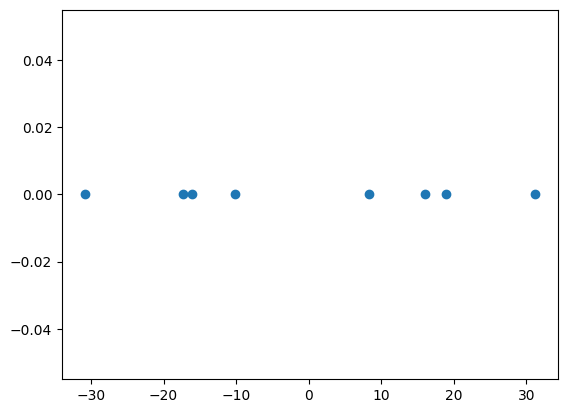

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(proj, [0,0,0,0,0,0,0,0])

plt.show()

In [ ]:
x1 = [19.,39.,30.,30.,15.,15.,15.,30.]
x2 =  [63.,74.,87.,23.,35.,43.,32.,73.]
N=np.size(x1)
X = np.column_stack([x1, x2])
X -= X.mean(axis=0)
fact = N-1
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[ 85.83928571 121.32142857]
 [121.32142857 551.07142857]]


In [ ]:
autovalor, autovector = np.linalg.eig(by_hand )
autovalor

array([ 56.10230167, 580.80841262])

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
W

In [ ]:
autovalor, autovector = np.linalg.eig(A)

In [ ]:
autovalor

array([ 56.10230167, 580.80841262])

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.2]
y= [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
datos = np.stack((x, y), axis=0)
datos

array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2. , 1. , 1.5, 1.2],
       [2.4, 0.7, 2.9, 2.2, 3. , 2.7, 1.6, 1.1, 1.6, 0.9]])

In [ ]:
b1 = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.2]
b2 =  [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
N=np.size(b1)
X = np.column_stack([b1, b2])
X -= X.mean(axis=0)
fact = N-1
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[0.60177778 0.60422222]
 [0.60422222 0.71655556]]


In [ ]:
Z = np.cov(x,y)
Z

array([[0.60177778, 0.60422222],
       [0.60422222, 0.71655556]])

In [ ]:
A=np.cov(datos)
A

array([[0.60177778, 0.60422222],
       [0.60422222, 0.71655556]])

In [ ]:
autovalor, autovector = np.linalg.eig(A)

In [ ]:
autovalor

array([0.04702256, 1.13951381])

In [ ]:
data_reduced = np.dot(data - pca.mean_, pca.components_.T)

In [ ]:
data_original = np.dot(data_reduced, pca.components_) + pca.mean_

If your data already has zero mean in each column, you can ignore the pca.mean_ above, for example

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)

data_reduced = np.dot(data, pca.components_.T) # transform
data_original = np.dot(data_reduced, pca.components_) # inverse_transform

For doing it manually, and truncating dimensions, data_reduced = np.dot(data, pca.components_.T[:,:dim]), and back data_original = np.dot(data_reduced, pca.components_[:dim, :])

https://github.com/scikit-learn/scikit-learn/blob/a95203b/sklearn/decomposition/pca.py#L99

For doing it manually, and truncating dimensions, data_reduced = np.dot(data, pca.components_.T[:,:dim]), and back data_original = np.dot(data_reduced, pca.components_[:dim, :]) –
Gulzar
 CommentedNov 30, 2019 at 20:38

Secondly, the shape of PCA.components_ is (n_components, n_features) while the shape of data to transform is (n_samples, n_features), so you need to transpose PCA.components_ to perform dot product.

Moreover, the first step of transform is to subtract the mean, therefore if you do it manually, you also need to subtract the mean at first.

The correct way to transform is

data_reduced = np.dot(data - pca.mean_, pca.components_.T)
2) inverse_transform is just the inverse process of transform

data_original = np.dot(data_reduced, pca.components_) + pca.mean_

For doing it manually, and truncating dimensions, data_reduced = np.dot(data, pca.components_.T[:,:dim]), and back data_original = np.dot(data_reduced, pca.components_[:dim, :]) –
Gulzar
 CommentedNov 30, 2019 at 20:38

In [4]:
from numpy.random import rand
from sklearn.decomposition import PCA

# PCA transform
data = rand(100, 10)
n_dim = data.shape[1]
pca = PCA(n_dim)
transformed = pca.fit_transform(data)

# Inverse PCA
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0
    return pca.inverse_transform(transformed)



In [9]:
new_data = inverse_pca(transformed, pca, 1)

In [10]:
new_data[:3]

array([[0.3942601 , 0.33713574, 0.69003481, 0.56520431, 0.10216222,
        0.92370359, 0.2015573 , 0.56920371, 0.56958712, 0.52273329],
       [0.69151678, 0.79737433, 0.56579425, 0.75676493, 0.50322428,
        0.7989385 , 0.41863082, 0.07946876, 0.53686306, 0.86224734],
       [0.86731551, 0.29366595, 0.84019149, 0.18898075, 0.72960807,
        0.8356996 , 0.3629377 , 0.67810949, 0.70128004, 0.79610863]])

In [8]:
data[:3]

array([[0.39511145, 0.30805767, 0.61395804, 0.47224143, 0.06082482,
        0.94154012, 0.20102868, 0.53002582, 0.50350177, 0.57885943],
       [0.69047081, 0.83309982, 0.65926261, 0.87097967, 0.55401165,
        0.77702443, 0.41928029, 0.12760294, 0.6180559 , 0.79329043],
       [0.86844285, 0.25516158, 0.73945278, 0.06588194, 0.67487025,
        0.85931823, 0.36223772, 0.62623124, 0.61377169, 0.87042928]])

In [ ]:
autovector

array([[-0.73977066, -0.67285911],
       [ 0.67285911, -0.73977066]])

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

iris = datasets.load_iris()
data = iris.data
pd.options.display.float_format = '{:,.4f}'.format
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['target'])
data1 = data1.iloc[:,0:4]
print(data1.shape)
samples = pd.DataFrame(data1.loc[[0,1,2]], columns = data1.keys()).reset_index(drop = True)
print(samples)
pca = PCA(n_components=2)
pca.fit(data1)
pca_data1 = pca.transform(data1)
pca_samples = pca.transform(samples)
print(pca.inverse_transform(pca_samples))

(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             5.1000            3.5000             1.4000            0.2000
1             4.9000            3.0000             1.4000            0.2000
2             4.7000            3.2000             1.3000            0.2000
[[5.08303897 3.51741393 1.40321372 0.21353169]
 [4.7462619  3.15749994 1.46356177 0.24024592]
 [4.70411871 3.1956816  1.30821697 0.17518015]]


In [11]:
import numpy as np
#Original dataset X
X=np.array([[11,2,25],[12,20, 31],[5,6,7],[200,10,22]])

#Get covariance matrix from X, if using numpy.cov,
#make sure set parameter rowvar to False

covX=np.cov(X, rowvar=False)

#Get eigenvalues and eigenvectors from covX
eigenvals, eigenvecs = np.linalg.eig(covX)

#pair the eigenvalue and corresponding eigenvector
pair = [(i[0], i[1]) for i in zip(eigenvals, eigenvecs)]
#Sort the eigenvectors by its eigenvalues in descending order
sortedPair=[[i[0], i[1]] for i in sorted(pair, key=lambda x: abs(x[0]), reverse=True)]

#Get sorted eigenvectors, keep the sort order.
W=np.array([i[1] for i in sortedPair])

def findTopPrincipalComponentNumber(eigenvals:list,threshold:int=0.80) -> (int, float):
        ''' findTopPrincipalComponentNumber will return k number that will meet the threshold'''
        total = sum(eigenvals)
        #Sort the Eigenvalues in descending order,
        #calculate each eiganvalue that contains percentage of information in raw dataset
        eachPercentList = [(i / total) for i in sorted(eigenvals, reverse=True)]
        cumulativePercept=0
        cumulativePerceptList=[]
        for i in eachPercentList:
            cumulativePercept+=i
            cumulativePerceptList.append(cumulativePercept)
            if cumulativePercept >= threshold:
                break
        return (len(cumulativePerceptList), float(cumulativePerceptList[-1]))
#get the k to have 95% of the original information from raw dataset
bestK, coveredPercentage = findTopPrincipalComponentNumber(eigenvals, 0.95)

#pca projected dataset is X times W
Z=np.matmul(X, W)

#Get bestK columns from Z, to created dimension reduced dataset pcaZ
#that has 98% of the information from original X
pcaZ=[]
for i in Z.tolist():
    subZ=[]
    for j in range(bestK):
        subZ.append(i[j])
    pcaZ.append(subZ)

#To reconstruct, can not use pcaZ, need to use Z
#Since Z = X times W, then X = Z times inversed(W)
restoredX = np.matmul(Z, np.linalg.inv(W))

#Restored original dataset, that should match original raw dataset X
restoredX

'''
array([[ 11.,   2.,  25.],
       [ 12.,  20.,  31.],
       [  5.,   6.,   7.],
       [200.,  10.,  22.]])
'''

#Original raw dataset
X

'''
array([[ 11,   2,  25],
       [ 12,  20,  31],
       [  5,   6,   7],
       [200,  10,  22]])
'''

'\narray([[ 11,   2,  25],\n       [ 12,  20,  31],\n       [  5,   6,   7],\n       [200,  10,  22]])\n'

In [12]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

X = sklearn.datasets.load_iris().data
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

[5.08303897 3.51741393 1.40321372 0.21353169]
